# Data Preparation

We'll start with importing the data to python as a pandas dataframe, and show the first 5 rows.


In [2]:
import pandas as pd
db=pd.read_csv('C:/Research/Databases/ElectionData/ByKalpi23_2020.csv', encoding='cp1255' )
db.head()

,סמל ועדה,ברזל,שם ישוב,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
0,18,9870,אבו גווייעד שבט,967,1.0,1,0,585,126,2,...,0,6,1,0,0,0,0,0,2,NaN
1,18,9871,אבו גווייעד שבט,967,2.0,1,0,764,249,2,...,0,0,0,0,0,0,0,2,0,NaN
2,18,9872,אבו גווייעד שבט,967,3.0,1,0,669,220,2,...,0,2,1,0,0,0,0,0,0,NaN
3,2,736,אבו גוש,472,1.0,1,0,530,299,7,...,0,11,0,0,0,0,0,0,2,NaN
4,2,737,אבו גוש,472,2.0,1,0,693,388,6,...,0,18,0,0,0,0,0,1,0,NaN


As can be seen (if you are familiar with Hebrew...) the data provided lists the actual votes for each political party at each ballot box. The ballot box is identified by the locality name and ID ("Barzel"). The latter needs to be translated into an address or the statistical area in which the ballot box is located (which is similar to a census tract). The current file further provides some summary with regrds to the total votes and the potential number of voters at the ballot box. 
At this point we will get rid of the last column ("Unnamed: 41") and rename the other variabes based on the name of the party (rather than the corresponding letters that appear in the note). For simplicity I keep only parties that passed the threshold (3.25%) and actually entered the Knesset.  

In [3]:
db.rename(columns = {'שם ישוב' : 'city','סמל ישוב' : 'citycode', 'ברזל' : 'Barzel' , 'בזב': 'v_potential', 'מצביעים': 'votes'}, inplace=True)
db.rename(columns = {'מחל': 'Likud', 'פה' : 'KaholLavan', 'ודעם': 'HareshimaHameshutefet' , 'שס' : 'Shas', 'ג' : 'YahadutHatora', 'אמת': 'HaAvoda', 'ל' : 'IsraelBeitenu', 'טב' : 'Yamina' }, inplace=True)
keep=[ 'Barzel', 'city','citycode','v_potential', 'votes', 'Likud', 'KaholLavan','HareshimaHameshutefet' ,'Shas', 'YahadutHatora', 'HaAvoda', 'IsraelBeitenu', 'Yamina' ]
db=db[keep]
db.head()

,Barzel,city,citycode,v_potential,votes,Likud,KaholLavan,HareshimaHameshutefet,Shas,YahadutHatora,HaAvoda,IsraelBeitenu,Yamina
0,9870,אבו גווייעד שבט,967,585,126,1,6,112,2,0,2,0,0
1,9871,אבו גווייעד שבט,967,764,249,2,0,235,0,0,6,0,0
2,9872,אבו גווייעד שבט,967,669,220,1,2,207,0,0,5,1,0
3,736,אבו גוש,472,530,299,32,11,229,2,1,15,0,0
4,737,אבו גוש,472,693,388,23,18,330,0,0,6,2,0


Here (https://bechirot23.bechirot.gov.il/election/Kneset20/Pages/BallotsList.aspx) we can find the ballot list with further details regarding the location of each ballot. Specifically, address, and statistical area.  

In [4]:
kalpi=pd.read_excel('C:/Research/Databases/ElectionData/kalpies_report_19_1_20_1.xlsx' )
kalpi.head()


,מס' ברזל,סמל ועדה,שם ועדה,סמל גוש ישובים,שם גוש ישובים,סמל ישוב בחירות,שם ישוב בחירות,סמל גוש ריכוזים,שם גוש ריכוזים,סמל קלפי,...,אוכלוסיה יהודים,בוחרי כנסת בפועל,סוג פיצול,מאות,ממספר,צורפ ל-,מחוז,מס' קלסר,סמל קלפי אם,מס' קלפיות אחורי איזון
0,1,1,ירושלים,0,NaN,3000,ירושלים,1,רעיה - אילנית,392.1,...,0,690,איזון קלפיות,NaN,NaN,NaN,ים,1,0,0
1,2,1,ירושלים,0,NaN,3000,ירושלים,1,רעיה - אילנית,392.2,...,0,690,איזון קלפיות,NaN,NaN,NaN,ים,1,0,0
2,3,1,ירושלים,0,NaN,3000,ירושלים,1,רעיה - אילנית,392.3,...,0,689,איזון קלפיות,NaN,NaN,NaN,ים,1,0,0
3,4,1,ירושלים,0,NaN,3000,ירושלים,1,רעיה - אילנית,423.0,...,545,440,NaN,NaN,NaN,NaN,ים,1,0,0
4,5,1,ירושלים,0,NaN,3000,ירושלים,1,רעיה - אילנית,530.0,...,776,696,NaN,NaN,NaN,NaN,ים,1,0,0


Here I keep only the address and the Statistical Area code (SA) and merge the datasets together. 

In [5]:
kalpi.rename(columns = {"מס' ברזל" : 'Barzel', 'סמל ישוב בחירות' : 'citycode', 'אג"ס' : 'SA' , 'כתובת קלפי': 'address'}, inplace=True)
kalpikeep = ['Barzel', 'citycode', 'SA' , 'address']
kalpi=kalpi[kalpikeep]
kalpi.head()
db=pd.merge(db,kalpi, left_on=['Barzel', 'citycode'] , right_on=['Barzel', 'citycode'], how='left', sort=False)
db['SA']=db['SA'].fillna(0)
del [kalpi, kalpikeep, keep] 

db.head()


,Barzel,city,citycode,v_potential,votes,Likud,KaholLavan,HareshimaHameshutefet,Shas,YahadutHatora,HaAvoda,IsraelBeitenu,Yamina,SA,address
0,9870,אבו גווייעד שבט,967,585,126,1,6,112,2,0,2,0,0,0.0,"ערערה-בנגב,ערערה-בנגב"
1,9871,אבו גווייעד שבט,967,764,249,2,0,235,0,0,6,0,0,0.0,"ערערה-בנגב,ערערה-בנגב"
2,9872,אבו גווייעד שבט,967,669,220,1,2,207,0,0,5,1,0,0.0,"ערערה-בנגב,ערערה-בנגב"
3,736,אבו גוש,472,530,299,32,11,229,2,1,15,0,0,0.0,"אל רשיד,1"
4,737,אבו גוש,472,693,388,23,18,330,0,0,6,2,0,0.0,"אל רשיד,1"


We are almost there - we now just want to aggregate the results in the SA level and than normalize the results in each SA by looking at percentages of the total votes, rather than the nominal votes, for each party. 

In [6]:
import pandasql as psql
#aggregation to the SA level
sa_db= psql.sqldf("SELECT citycode, SA, MIN(city) as city, MIN(address) as adress, SUM(v_potential) as v_potential, SUM(votes) as votes, SUM(Likud) as Likud, SUM(KaholLavan) as KaholLavan, SUM(HareshimaHameshutefet) as HareshimaHameshutefet, SUM(Shas) as Shas, SUM (YahadutHatora) as YahadutHatora, SUM(HaAvoda) as HaAvoda, SUM(IsraelBeitenu) as IsraelBeitenu, SUM(Yamina) as Yamina FROM db GROUP BY citycode, SA   ")

#normalizing the votes data
toNorm=['Likud', 'KaholLavan','HareshimaHameshutefet' ,'Shas', 'YahadutHatora', 'HaAvoda', 'IsraelBeitenu', 'Yamina']

for i in toNorm:
    sa_db[i]=sa_db[i]/sa_db['votes']
sa_db.head()
    

,citycode,SA,city,adress,v_potential,votes,Likud,KaholLavan,HareshimaHameshutefet,Shas,YahadutHatora,HaAvoda,IsraelBeitenu,Yamina
0,7,0.0,שחר,שחר,521,387,0.452196,0.279070,0.00000,0.124031,0.015504,0.054264,0.028424,0.038760
1,10,0.0,תירוש,תירוש,331,252,0.539683,0.019841,0.00000,0.373016,0.011905,0.007937,0.003968,0.039683
2,11,0.0,ניר חן,"ניר ח""ן",404,271,0.309963,0.420664,0.00369,0.025830,0.000000,0.107011,0.066421,0.055351
3,13,0.0,חצבה,חצבה,519,396,0.075758,0.691919,0.00000,0.002525,0.002525,0.113636,0.030303,0.063131
4,15,0.0,נועם,נועם,313,235,0.744681,0.029787,0.00000,0.178723,0.008511,0.004255,0.000000,0.021277


Now the relevant data is normalized and ready for the clustering process. 

# K-means Clustering 

## Determining the Number of Clusters Using the Elbow Method  

We would like our cluster to have a minimal error. In other words, that the distance between the mean values (in our case, the vote percentage for each party) of each cluster and the values in each observation (SA) would be as small as possible.
Obviously, if we increase the number of clusters we decrease the error. However- the lower the number of clusters, the easier it is to interprate and handle the data for practical needs. The Elbow Method suggets to try different numbers of clusters (different values for 'k'), plot it, and look for the point that the gain from adding another cluster seems low enough to stop splitting the data. 
Below I do exactly that, using 2 measures for this purpose: (1) 'wss' - the sum of intra-cluster squared error (which we want to be as low as possible; and (2) 'scr' - opposite of the value of our observations on the K-means objective (which is very similar, but negative and given directly by the sklearn library). 
The graph suggets that choosing a k larger than 5 would not add much. We will go ahead and use k=5 in our clustering.

In [7]:
from sklearn.cluster import KMeans

import numpy as np
X = sa_db[toNorm]

elbow=pd.DataFrame(range(1,10))
elbow.rename(columns = {0 : 'k'}, inplace=True) 
elbow['wss']=0
elbow['scr']=0

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X,sample_weight=sa_db['votes'])
    elbow.wss[i]=pd.DataFrame(kmeans.transform(X)).min(axis=1).sum()
    elbow.scr[i]=kmeans.score(X,sample_weight=sa_db['votes'])

    
    
elbow.where(elbow['k']>1).plot(x='k',y=['wss','scr'])


## Making Sense of the Clustering Results

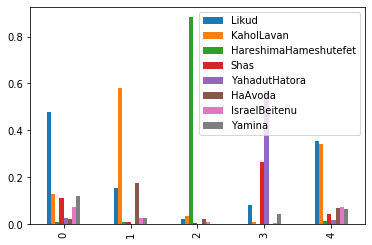

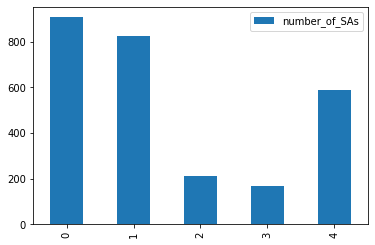

In [8]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=sa_db['votes'])
sa_db['cluster']=kmeans.labels_
averages= psql.sqldf("SELECT  AVG(Likud) as Likud, AVG(KaholLavan) as KaholLavan, AVG(HareshimaHameshutefet) as HareshimaHameshutefet, AVG(Shas) as Shas, AVG(YahadutHatora) as YahadutHatora, AVG(HaAvoda) as HaAvoda, AVG(IsraelBeitenu) as IsraelBeitenu, AVG(Yamina) as Yamina FROM sa_db GROUP BY cluster   ")
averages.plot.bar()
counts= psql.sqldf("SELECT COUNT(1) as number_of_SAs FROM sa_db GROUP BY cluster   ")
counts.plot.bar()

There are 2 plots above. The first shows the intra-cluster mean vote percentage for each party, which helps us characterize the cluster. Namely, cluster "0" leans towards a more ***Right-Wing*** ideology (dominant parties: Likud, Yamina, Israel Beitenu); Cluster "1" clusters more ***Left-Wing*** ideology (dominant parties: Kahol Lavan, HaAvoda); Cluster "2" clusters areas with support to the ***Arab*** party; "4" mostly ***Ultra Orthodox*** (Shas and Yahadut HaTora); and "5" clusters more ***Center*** and ideologically diverse statistical areas. 
The second bar chart depicts the number of SAs that were classified in each cluster. It can be seen that under this clustering and spatial aggregation - most SAs are Right-Wing, then with a small gap the Left-Wing SAs and the Center SAs. The Arab and Ultra Orthodox are farther behind.


In [9]:
clusternames=pd.DataFrame({'cluster': [0,1,2,3,4], 'clusterName': ["Right-Wing", "Left-Wing", "Arab", "Ulta Orthodox", "Center"]})
sa_db=pd.merge(sa_db,clusternames, left_on=['cluster'] , right_on=['cluster'], how='left', sort=False)

# The Ideological Map of Israel

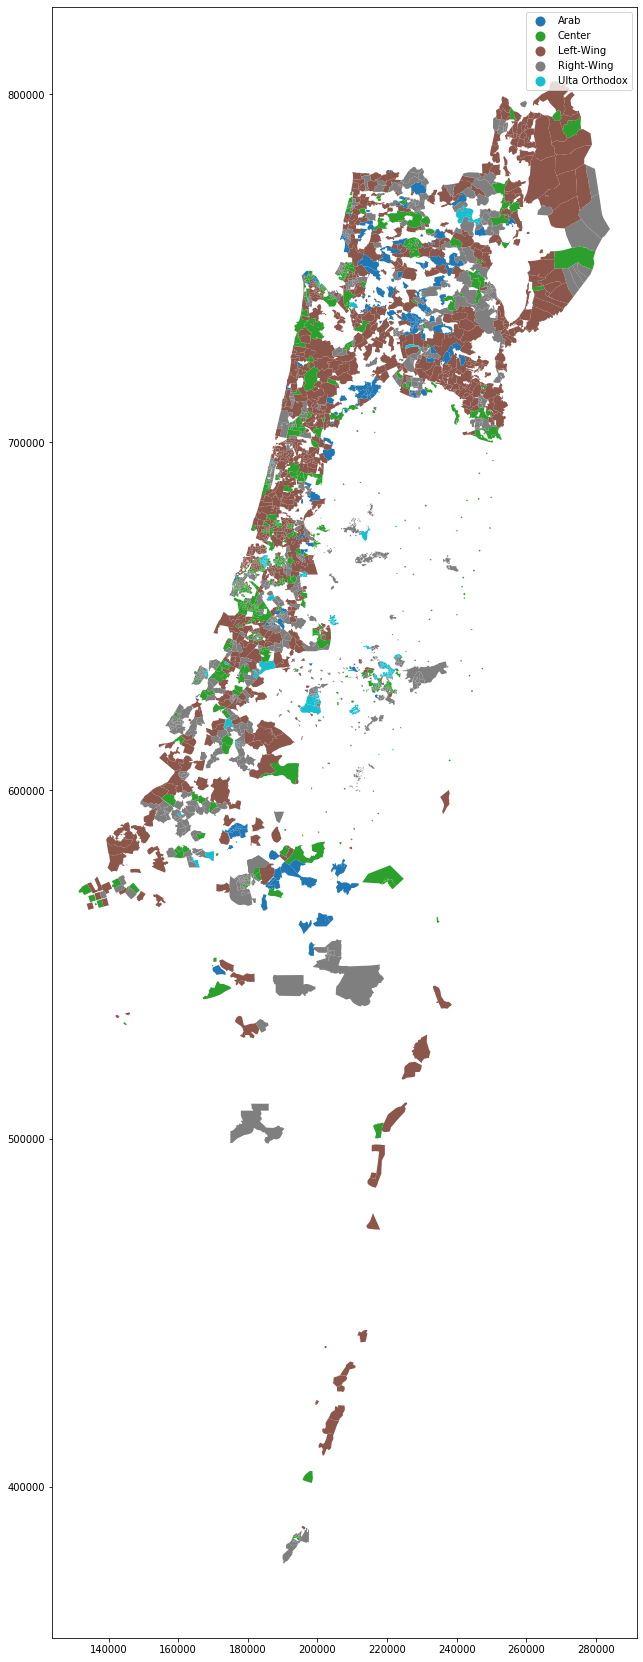

In [10]:

import geopandas as gpd

sa_poly=gpd.read_file('C:/Research/Databases/shp files/SAs/2008/stat_2008_NEW_04Nov_1335.shp')
Ideology_Poly= gpd.pd.merge(sa_poly, sa_db, right_on=['citycode', 'SA'], left_on=['SEMEL_YISH', 'STAT08'], how='right', sort=False)
Ideology_Poly2= gpd.pd.merge(sa_db, sa_poly, left_on=['citycode'], right_on=['SEMEL_YISH'], how='left', sort=False).drop_duplicates(subset=['citycode'], keep='last')[['citycode', 'Shem_Yis_1', 'Shape_Leng', 'Shape_Area', 'OBJECTID', 'geometry']]
Ideology_Poly=gpd.pd.merge(Ideology_Poly, Ideology_Poly2, left_on=['citycode'], right_on=['citycode'], how='left', sort=False)

for var in ['Shem_Yis_1', 'Shape_Leng', 'Shape_Area', 'OBJECTID', 'geometry']:
    var_x=var+'_x'
    var_y=var+'_y'
    Ideology_Poly[var_x]=np.where(Ideology_Poly[var_x].isna(), Ideology_Poly[var_y], Ideology_Poly[var_x])
    Ideology_Poly.rename(columns={var_x: var}, inplace=True)
    Ideology_Poly=Ideology_Poly.drop(var_y, axis=1)

Ideology_Poly=Ideology_Poly.drop(['SEMEL_YISH', 'YISHUV_STA', 'Shem_Yishu', 'STAT08'], axis=1)
    
del Ideology_Poly2
del var, var_x, var_y    

import matplotlib.pyplot as plt

Ideology_Poly.plot(column='clusterName', figsize=(60, 30), legend=True)

Interestingly, the first impression from looking at the resuls is that the dominant ideology is left-wing. While right wing parties were more successful in attracting voters, it seems that it you will through an arrow on the map - you are much more likely to hit a left-wing area. This of course may be possible if, for example, larger in area SAs and/or less dense SAs tend to be left wing. 



## A slightly deeper analysis

Let's examine these hypotheses. using a logit regression. On the lefthand side (*LeftWing*) we will use a binary variable that takes 1 if the statistical area belongs to the left-wing cluster and 0 otherwise; on the right hand side we will place 2 variables: *Area* the area of the SA (in m^2), and *voters* the potential voters. We expect *Area* to get a positive effect on *LeftWing* (positive coefficietnt) and *voters* to have negative effect (and therefore cnegative coefficient). 

In [11]:

DataOfInterest=Ideology_Poly[['cluster','Shape_Area','votes']].dropna(axis=0)
DataOfInterest['LeftWing']=np.where(DataOfInterest['cluster']==1,1,0)
import statsmodels.formula.api as smf 
smf.logit(formula = 'LeftWing ~ Shape_Area + votes', data=DataOfInterest).fit().summary()


Optimization terminated successfully.
         Current function value: 0.578516
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               LeftWing   No. Observations:                 2647
Model:                          Logit   Df Residuals:                     2644
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Nov 2020   Pseudo R-squ.:                 0.06392
Time:                        10:42:38   Log-Likelihood:                -1531.3
converged:                       True   LL-Null:                       -1635.9
                                        LLR p-value:                 3.888e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4977      0.077     -6.493      0.000      -0.648      -0.347
Shape_Area  7.163e-08   9.89e-09      7.243      0.000    5.22e-08     9.1e-08
votes         -0.0004   4.03e-05     -8.817      0.000      -0.000      -0.000
==============================================================================
"""

The Logit procedure results table supports both hypothese - being larger in size or less dense in population increases the probability of an SA to be included in the 'Left-Wing' clusted. 

## This is it for today. 

The complete list of SAs and their ideological cluster is available on GitHub. 